# Stroke Risk Prediction Using Machine Learning

Stroke is a leading cause of disability and death worldwide. Identifying individuals at high risk can support early intervention and clinical decision-making.

This project uses a publicly available dataset containing demographic and clinical features to build a simple machine learning model that predicts the likelihood of stroke.

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:/Users/Habeeb/Desktop/ML/Stroke Risk Prediction/data/healthcare-dataset-stroke-data.csv')

# About the dataset

### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Acknowledgements
(Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.
NB: I downloaded from Kaggle

# Data Overview

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning

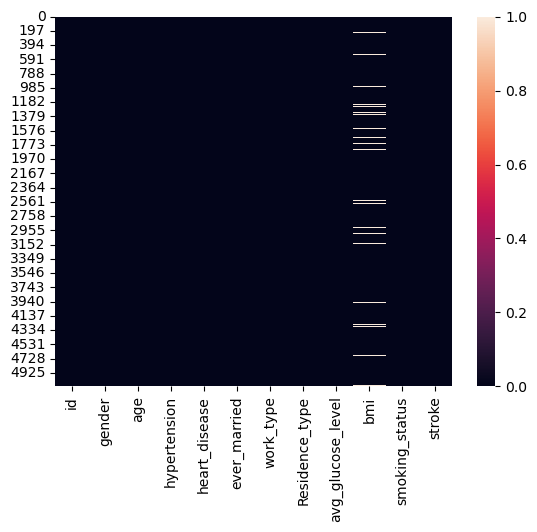

In [13]:
# To check where the missing values are located using a heatmap

sns.heatmap(df.isnull());

In [14]:
# % of rows with missing values of bmi 
100*201/5110 

# Dropping this 4% is not a bad decision

3.9334637964774952

In [15]:
df = df.dropna(axis=0,subset='bmi')

#df_copy.isnull().sum()

In [16]:
# The id is not needed in our ML model

df = df.drop(axis=1,columns='id')
#df_copy.head()

In [17]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [18]:
df = df.drop(index=3116)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [19]:
# Dealing with outliers in avg_glucose_level using the IQR method (Winsorization)

#def clip_outliers()
q25,q75=np.percentile(a=df['avg_glucose_level'],q=(25,75))

IQR = q75 - q25
lower_fence = q25 - 1.5*IQR
higher_fence = q75 + 1.5*IQR

print(f'Lower fence = {lower_fence.round(1)} and Higher fence = {higher_fence.round(1)}')

Lower fence = 22.4 and Higher fence = 168.1


# EDA & Visualisation

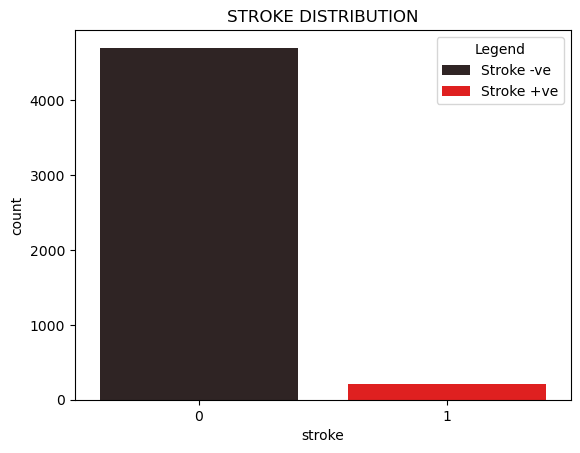

In [28]:
sns.countplot(data=df,x='stroke',hue='stroke',palette='dark:red')
plt.title('STROKE DISTRIBUTION')

plt.legend(labels=('Stroke -ve','Stroke +ve'), title='Legend');


Text(0.5, 1.0, 'Stroke Cases By Age')

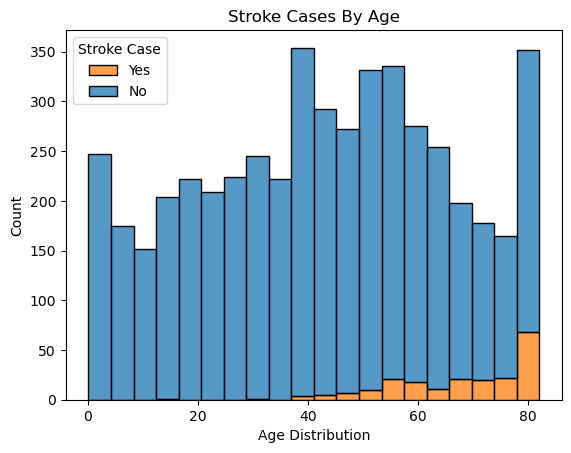

In [30]:
sns.histplot(data=df,x='age',hue='stroke',multiple='stack')
plt.legend(title='Stroke Case',labels=['Yes','No'])
plt.xlabel('Age Distribution')
plt.title("Stroke Cases By Age")

In [31]:
df['stroke'].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Stroke Cases')

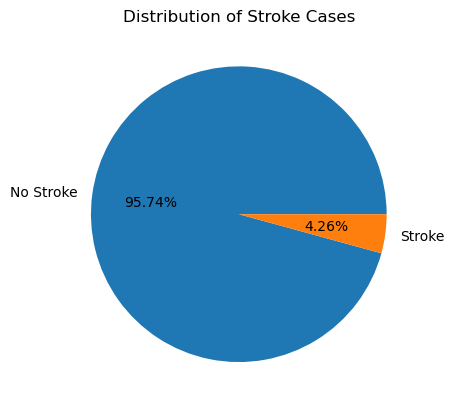

In [32]:
stroke_count = [4699,209]
labels = ('No Stroke','Stroke')

plt.pie(x=stroke_count,labels=labels,autopct='%1.2f%%')
plt.title('Distribution of Stroke Cases')

In [33]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

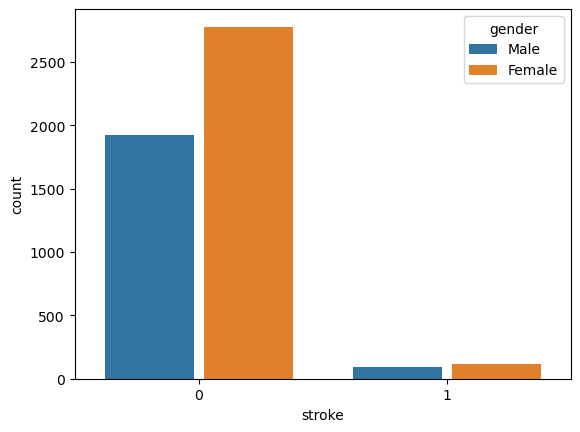

In [34]:
sns.countplot(data=df,x='stroke',hue='gender',gap=0.1);

In [35]:
df.groupby('gender')['stroke'].sum()

gender
Female    120
Male       89
Name: stroke, dtype: int64

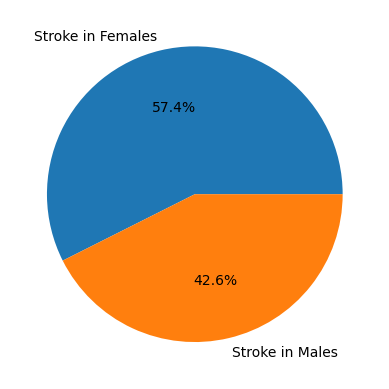

In [36]:
plt.pie(x=df.groupby('gender')['stroke'].sum(),labels=['Stroke in Females','Stroke in Males'],autopct='%1.1f%%');

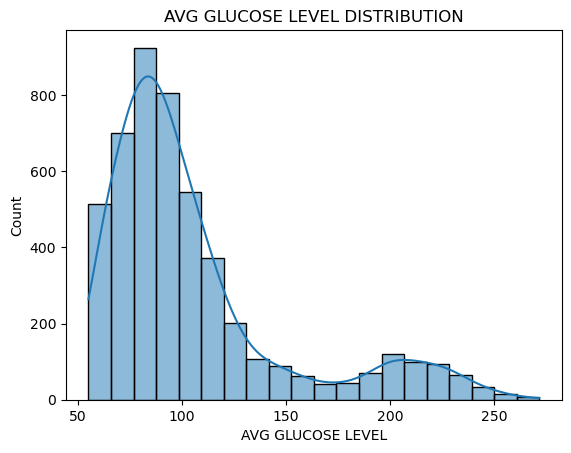

In [37]:
sns.histplot(data=df,x='avg_glucose_level',kde=True,bins=20)
plt.title('AVG GLUCOSE LEVEL DISTRIBUTION')
plt.xlabel("AVG GLUCOSE LEVEL");

In [38]:
object_df = df.select_dtypes(include='object')
object_df.head(1)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked


In [39]:
numeric_df = df.select_dtypes(exclude='object')
numeric_df.head(1)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1


In [40]:
object_df_dummies = pd.get_dummies(data=object_df,drop_first=True,dtype='int')
object_df_dummies.head()

,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,0,1,0,0,1,1,0,0
2,1,1,0,1,0,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0
5,1,1,0,1,0,0,1,1,0,0


In [41]:
final_df = pd.concat([numeric_df,object_df_dummies],axis=1)
final_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0,0,0,0,0,1,0,0,0,0
5106,81.0,0,0,125.20,40.0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,1,0,0,0,1,0,0


In [42]:
final_df.corr()['stroke'].sort_values()

work_type_children               -0.080990
work_type_Never_worked           -0.014152
Residence_type_Urban              0.005988
gender_Male                       0.006904
smoking_status_never smoked       0.010690
work_type_Private                 0.014972
smoking_status_smokes             0.021513
bmi                               0.042341
work_type_Self-employed           0.055338
smoking_status_formerly smoked    0.057443
ever_married_Yes                  0.105051
heart_disease                     0.137929
avg_glucose_level                 0.138984
hypertension                      0.142503
age                               0.232313
stroke                            1.000000
Name: stroke, dtype: float64

# Preparing Data for Modeling

In [43]:
X = final_df.drop('stroke',axis=1)
y = final_df['stroke']

In [50]:
# Resolve imbalanced dataset using random over sampling method

from imblearn.over_sampling import RandomOverSampler

In [51]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)

X_res, y_res = ros.fit_resample(X, y)

In [53]:
y_res.value_counts()

# dataset balanced!

stroke
1    4699
0    4699
Name: count, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Training a Simple Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_model = LogisticRegression(class_weight='balanced',max_iter=5000)

log_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [81]:
log_model.coef_

array([[ 1.75418568,  0.24971121,  0.10683857,  0.21514511,  0.10334908,
        -0.00372444, -0.00586118, -0.11611564,  0.04782504, -0.04909594,
         0.2465462 ,  0.03437883,  0.11205039, -0.02327833,  0.23800392]])

# Evaluation

In [82]:
y_pred = log_model.predict(scaled_X_test)

In [83]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay

In [84]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7920212765957447

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       922
           1       0.78      0.82      0.80       958

    accuracy                           0.79      1880
   macro avg       0.79      0.79      0.79      1880
weighted avg       0.79      0.79      0.79      1880



In [86]:
confusion_matrix(y_test,y_pred)

array([[705, 217],
       [174, 784]])

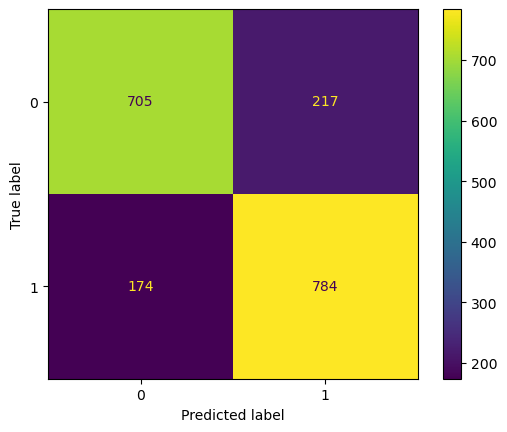

In [87]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [97]:
y_pred[0]

np.int64(1)

In [98]:
y_pred[1]

np.int64(0)

# Clinical Interpretation of Results

The model demonstrates moderate performance in predicting stroke risk using routine demographic and clinical features. While overall accuracy is acceptable, false negatives remain clinically significant, as missed stroke-risk patients may delay preventive intervention. This highlights the trade-off between sensitivity and specificity in medical machine learning applications.

# Limitations

This model was trained on a structured tabular dataset and does not incorporate imaging, laboratory results, or longitudinal patient history. Performance may therefore differ in real-world clinical settings.

# Future Improvements

Potential extensions of this project include:
- Comparison with tree-based and ensemble models (Random Forest, XGBoost)  
- Application of SMOTE and other resampling techniques  
- Optimization for recall to reduce false negatives  
- ROC-AUC and threshold tuning  
- Validation using real-world clinical datasets  